# Author: Bakki Akhil

### The main aim of this project is to create a cartoon for an image uploaded.
### For this project we have used OpenCV, which is a huge open-source library for computer vision, machine learning, and image processing.
### OpenCV supports a wide variety of programming languages like Python, C++, Java, and many more.
### We have used pyplot for ploting the images.
### The whole project is done using Tkinter library.

In [69]:
import cv2 # It has been imported for using OpenCV for Image Processing

In [70]:
import easygui # It is used to open file box. It allows user to open any file from system

In [71]:
import numpy # Images are stored and processed as numbers. These are taken as arrays

In [72]:
import imageio # it is used to read image at a particular path

In [73]:
import sys # it is used to manipulate different parts of the python run time environment

In [74]:
import matplotlib.pyplot as plt # this is used for visualization and ploting

In [75]:
import os # It is used for creating a function for creating and removing a directory(folder), fetching its content, changing and identifying current directory

In [76]:
import tkinter as tk
from tkinter import filedialog # this is used to open, save files or directories
from tkinter import *
from tkinter import messagebox # Messagebox is used to display messageboxes for application

In [77]:
import PIL # importing Python imaging library for image processing
from PIL import ImageTk,Image # Python imaging library is an image processing package for python language, it is used in editing, creating and saving image

In [78]:
root = tk.Tk()
root.geometry("400x400")
root.title("Cartoonify your Image!")
root.configure(background = 'white')
label = Label(root, background = '#CDCDCD', font = ('calibri',20,'bold'))

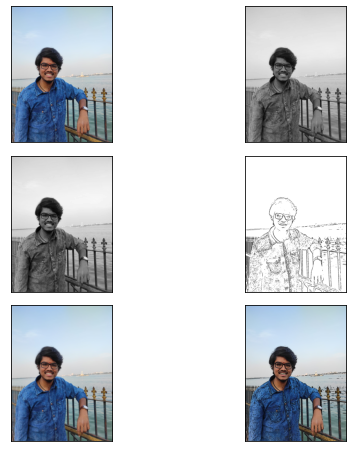

In [79]:
# Running the program in a class ImageCartoonify
class ImageCartoonify:
    
    #The below code initializes the variables
    def __init__(self):
        self.upload = Button(root, text = "Cartoonify an Image", command = self.upload, padx = 10, pady = 5)
        self.upload.configure(background = '#364156', foreground = 'white', font = ('calibri', 10, 'bold'))
        self.upload.pack(side = TOP, pady = 5)
        self.btn_quit = Button(root, text = "Quit", command = root.destroy)# This is Quit button, which closes the window
        self.btn_quit.configure(background = '#364156', foreground = 'white', font = ('calibri', 10, 'bold'))
        self.btn_quit.pack(side = BOTTOM, pady = 5)
        root.mainloop()
    
    #The below code is used to upload the image
    # fileopenbox opens the box to choose file and helps us to store file path as a string
    def upload(self):
        self.imagepath = easygui.fileopenbox()
        self.cartoonify()
        
    #The below code is used to Cartoonify the selected Image
    def cartoonify(self):
        # read the image
        self.orginalimage = cv2.imread(self.imagepath)
        self.orginalimage = cv2.cvtColor(self.orginalimage, cv2.COLOR_BGR2RGB)
        
        # confirm that image is choosen
        if self.orginalimage is None:
            print("Can't find any image. Choose appropriate file")
            sys.exit()
        
        # Resizing the selected image in a specified format(size)
        self.resized1 = cv2.resize(self.orginalimage, (1197,1600))
        
        # converting image into grayscale
        self.grayscaleimage = cv2.cvtColor(self.orginalimage, cv2.COLOR_BGR2GRAY)
        self.resized2 = cv2.resize(self.grayscaleimage, (1197,1600))
        
        # applying a median blur to smoothen an image
        self.smoothgrayscale = cv2.medianBlur(self.grayscaleimage, 5)
        self.resized3 = cv2.resize(self.smoothgrayscale, (1197,1600))
        
        # retrieving edges for cartoon effect by using thresholding technique
        self.getedge = cv2.adaptiveThreshold(self.smoothgrayscale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
        self.resized4 = cv2.resize(self.getedge, (1197,1600))#(960,540)
        
        # applying bilateral filter to remove noise and keeping edges sharp as required
        self.colorimage = cv2.bilateralFilter(self.orginalimage, 9, 300, 300)
        self.resized5 = cv2.resize(self.colorimage, (1197,1600))
        
         #masking edged image with our "BEAUTIFY" image
        self.cartoonimage = cv2.bitwise_and(self.colorimage, self.colorimage, mask = self.getedge)
    
        self.resized6 = cv2.resize(self.cartoonimage, (1197,1600))
        
        #ploting the whole transition
        self.images = [self.resized1, self.resized2, self.resized3, self.resized4, self.resized5, self.resized6]
    
        self.fig, self.axes = plt.subplots(3, 2, figsize = (8,8), subplot_kw = {'xticks' : [], 'yticks' : []}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
        for self.i, self.ax in enumerate(self.axes.flat):
            self.ax.imshow(self.images[self.i], cmap = 'gray')
            
        self.save1 = Button(root, text = "Save Cartoon Image", command = lambda: self.save(), padx = 30, pady = 5)
        self.save1.configure(background = '#364156', foreground = 'white', font = ('calibri', 10, 'bold'))
        self.save1.pack(side = TOP, pady = 5)

        plt.show()# This shows the 6 resized images in output
    
    def save(self):
        # saving an image using imwrite()
        self.newName = "Cartoonified_Image"
        self.path1 = os.path.dirname(self.imagepath)
        self.extension = os.path.splitext(self.imagepath)[1]
        self.path = os.path.join(self.path1, self.newName+self.extension)
        cv2.imwrite(self.path, cv2.cvtColor(self.resized6, cv2.COLOR_RGB2BGR))
        self.I = " Image saved by name " + self.newName + " at " + self.path
        tk.messagebox.showinfo(title = None, message = self.I)
           
imagecartoonify = ImageCartoonify()